In [2]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.examples.tutorials.mnist import input_data


In [3]:
sess=tf.Session()
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
train_size=1000
test_size=102
rand_train_indicies = np.random.choice(len(mnist.train.images), train_size, replace=True)
rand_test_indicies= np.random.choice(len(mnist.test.images), test_size, replace=False)
x_vals_train = mnist.train.images[rand_train_indicies]
x_vals_test=mnist.train.images[rand_test_indicies]
y_vals_train=mnist.train.labels[rand_train_indicies]
y_vals_test=mnist.test.labels[rand_test_indicies]

In [7]:
k = 4
batch_size=6

In [8]:
x_data_train=tf.placeholder(shape=[None, 784], dtype=tf.float32)
x_data_test=tf.placeholder(shape=[None, 784], dtype=tf.float32)
y_target_train=tf.placeholder(shape=[None, 10], dtype=tf.float32)
y_target_test=tf.placeholder(shape=[None, 10], dtype=tf.float32)

In [10]:
distance=tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), reduction_indices=2)

In [13]:
top_k_vals, top_k_indices=tf.nn.top_k(tf.negative(distance), k=k)
prediction_indices=tf.gather(y_target_train, top_k_indices)
count_of_predictions=tf.reduce_sum(prediction_indices, reduction_indices=1)
prediction=tf.argmax(count_of_predictions, dimension=1)


Instructions for updating:
Use the `axis` argument instead


In [15]:
num_loops = int(np.ceil(len(x_vals_test)/batch_size))
test_output=[]
actual_vals=[]
for i in range(num_loops):
    min_index= i*batch_size
    max_index=min((i+1)*batch_size, len(x_vals_train))
    x_batch=x_vals_test[min_index:max_index]
    y_batch=y_vals_test[min_index:max_index]
    predictions=sess.run(prediction, feed_dict={x_data_train:x_vals_train, x_data_test:x_batch, y_target_train:y_vals_train
                                               , y_target_test:y_batch})
    test_output.extend(predictions)
    actual_vals.extend(np.argmax(y_batch, axis=1))
    

In [17]:
accuracy=sum([1./test_size for i in range(test_size) if test_output[i] == actual_vals[i]])
print('Accuracy on test set:' + str(accuracy))


Accuracy on test set:0.13725490196078427


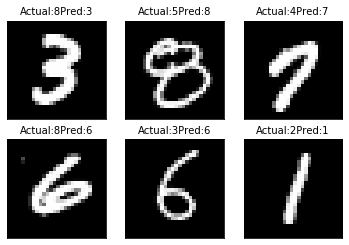

In [19]:
actuals = np.argmax(y_batch, axis=1)
Nrows=2
Ncols=3
for i in range(len(actuals)):
    plt.subplot(Nrows, Ncols, i+1)
    plt.imshow(np.reshape(x_batch[i], [28, 28]), cmap='Greys_r')
    plt.title('Actual:'+ str(actuals[i]) + 'Pred:' + str(predictions[i]), fontsize=10)
    frame=plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)